In [1]:
from emmo import get_ontology
#import networkx as nx
#import plotly.graph_objects as go
from emmo.graph import OntoGraph, cytoscapegraph
#import pydotplus
#import ipycytoscape
import ipywidgets as widgets
import owlready2
#from networkx.readwrite.json_graph import cytoscape_data

In [2]:

def en(s):
    """Returns `s` as an English location string."""
    return owlready2.locstr(s, lang='en')

# Create Team 4.0
from emmo import World
world = World()
emmo = world.get_ontology('emmo-inferred').load()
emmo.sync_python_names()  # Syncronize annotations
emmo.base_iri = emmo.base_iri.rstrip('/#')

# fof = get_ontologt('').load()

team40onto = world.get_ontology('http://sintef.no/Team4.0#')
team40onto.base_iri = 'http://sintef.no/Team4.0#'
team40onto.imported_ontologies.append(emmo)
team40onto.sync_python_names()

with team40onto:
    class Team(team40onto.Collection):
        '''Collection of people that form a team'''
    
    
    class Person(team40onto.Interpreter):
        '''A person'''
        
    class SINTEFPerson(team40onto.Person):
        '''A person that works at SINTEF'''
    
    class SINTEFIndustryPerson(team40onto.SINTEFPerson):
        '''A person that works at SINTEF Industry'''
    
    class SINTEFOceanPerson(team40onto.SINTEFPerson):
        '''A person that works at SINTEF Ocean'''
    
    class Researcher(team40onto.Person):
        '''A Researcher'''
        
    class Developer(team40onto.Person):
        '''A developer'''
    
    class Thomas(team40onto.SINTEFOceanPerson):
        '''A docker enthusiast'''
        is_a = [team40onto.Developer]
        
    class Jesper(team40onto.SINTEFIndustryPerson):
        '''A kayakiing enthusiast'''
        is_a = [team40onto.Researcher]
    
    class Petter(team40onto.SINTEFOceanPerson):
        '''Is an aerospace and agile-devops enthusiast'''
        is_a = [team40onto.Developer]
        
    class Treesa(team40onto.SINTEFOceanPerson):
        '''Is a go-kart enthusiast'''
        is_a = [team40onto.Developer]

    class Sylvain(team40onto.SINTEFIndustryPerson):
        '''Is a ping-pong enthusiast'''
        is_a = [team40onto.Researcher]
        
    class BjornTore(team40onto.SINTEFIndustryPerson):
        '''A skiing enthusiast'''
        is_a = [team40onto.Researcher]
     
    class Francesca(team40onto.SINTEFIndustryPerson):
        '''Has too many hobbies'''
        is_a = [team40onto.Researcher]
        
    class Team40(team40onto.Team):
        '''A team that solve all problems 4.0'''
        is_a = [team40onto.hasProperPart.some(team40onto.Thomas),
                team40onto.hasProperPart.some(team40onto.Petter),
                team40onto.hasProperPart.some(team40onto.Treesa),
                team40onto.hasProperPart.some(team40onto.Jesper),
                team40onto.hasProperPart.some(team40onto.Sylvain),
                team40onto.hasProperPart.some(team40onto.BjornTore),
                team40onto.hasProperPart.some(team40onto.Francesca),
               ]
team40onto.sync_attributes(class_docstring='elucidation')
team40onto.sync_attributes(name_policy='uuid', name_prefix='EMMO_')

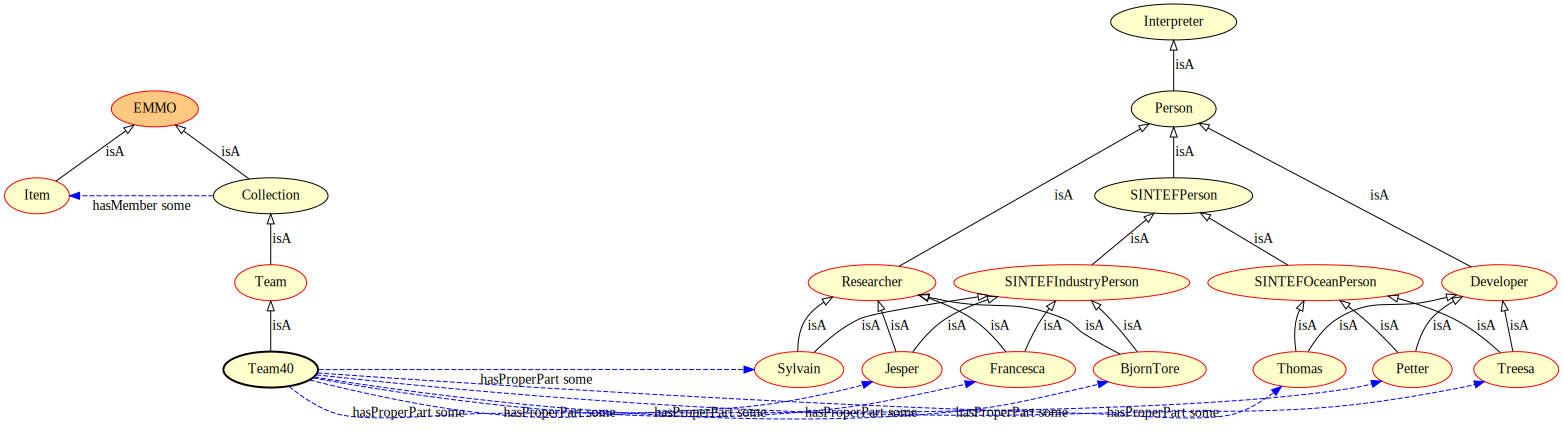

In [3]:
leafs = set()
for s in team40onto.Team.subclasses():
    leafs.update(s.subclasses())
g = OntoGraph(team40onto, team40onto.Team40, relations='all', addnodes=True, parents=2)
g.add_entities([team40onto.Interpreter, team40onto.Person, team40onto.SINTEFPerson])
#g.add_entities(onto, relations='all', edgelabels=True)
g.dot

In [7]:
graph = cytoscapegraph(g, team40onto)
display(graph[0])
display(graph[1])

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…

Output()